### Rescheduled Class
You should all have received an email concerning the 2 rescheduled class.
<br>Rescheduled classes will be held on: 
- 06/26 (June 26, Tuesday ), period 1, room CALL 23 
- 06/29 (June 29, Friday ), period 5, room CALL 23 

You may attend either class. 

These classes are for you to ask questions and get help with your assignment. 

There will be *no new taught material* in these classes.


## Please download the new class notes.
### Step 1 : Navigate to the directory where your files are stored.  
Open a terminal. 
<br>Using `cd`, navigate to *inside* the ILAS_Python_for_engineers folder on your computer. 
### Step 3 : Update the course notes by downloading the changes
In the terminal type:

>`git add -A
git commit -m "commit"
git fetch upstream
git merge -X theirs upstream/master`


# Introduction to Simulation

<br> <a href='#SolvingOrdinaryDifferentialEquations'>Recap: Solving Ordinary Differential Equations (ODE)</a>
<br> <a href='#DiscontinuousFunctions'>Discontinuous Functions</a>
    <br> &emsp;&emsp; <a href='#ExampleMixingTank'>Example : A Mixing Tank</a> 
<br> <a href='#SolvingODESpecificSolutionValue'>Solving an ODE for a Specific *Solution* Value</a> 
    <br> &emsp;&emsp; <a href='#ExampleReactorPart1'>Example : Reactor, Part 1</a> 
<br> <a href='#SolutionODESpecificInputValues'>Solution to an ODE evaluated at Specific *Input* Values</a> 
    <br> &emsp;&emsp; <a href='#ExampleReactorPart2'>Example : Reactor, Part 2</a>
<br> <a href='#MatrixMultiplicationRules'>Matrix Multiplication Rules</a> 
<br> <a href='#UsefulMatrixOperations'>Useful Matrix Operations</a>
<br> <a href='#SystemsDifferentialEquations'>Systems of Differential Equations </a>
<br> <a href='#InteractivePlots'>Interactive Plots</a>
<br> &emsp;&emsp; <a href='#InstallingFFmpeg'>Installing FFmpeg</a> 
<br> <a href='#AnimatedPlots'>Animated Plots</a>
<br> &emsp;&emsp; <a href='#ExampleAnimatingLine'>Example: Animating a Line</a> 
<br> &emsp;&emsp; <a href='#ExampleSpringMassSystem'>Example : Simulating Physical Systems, Spring-Mass System</a> 
<br> &emsp;&emsp; <a href='#ExamplePlottingObject'>Example : Simulating Physical Systems, Trajectory : Plotting the Object</a> 
<br> &emsp;&emsp; <a href='#ExamplePlottingPath'>Example : Simulating Physical Systems, Trajectory : Plotting the Path</a> 
<br> &emsp;&emsp; <a href='#ExamplePlottingPathObject'>Example : Simulating Physical Systems, Trajectory : Plotting the Path and Object</a> 
<br> <a href='#Summary'>Summary</a>


### Lesson Goal

Produce simulations of systems to observe:
- time-varying
- parameter-varying

effects.

### Fundamental programming concepts
Employing computational image generation to represet real-life problems.

1. Grpahical representation
1. Animated representation


## Recap: Solving Ordinary Differential Equations (ODE)
<a id='SolvingOrdinaryDifferentialEquations'></a>
In the previous seminar we studied the function `scipy.integrate.odeint`.

The function gives a numerical solution to a first order differential equation for a given input parameter e.g. time.

Estimation methods can provide an easier way to solve problems than finding an analytical soltion to the equation. 

In [227]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

__Analytical solution (to an ODE) :__ 
<br>A function, which can be solved to get a particular value.

e.g. solution to an ODE : $y(x) = exp(x)$
<br>We can *solve* the solution to find the value of $x$ where $y(x) = 2$.

Few practical systems lead to analytical solutions. Their use is limited use. 


__Numerical approximation (of an ODE) :__
<br>Independent variable and approximation of corresponding function value at that variable. 

To recap last weeks class...

The function `odeint` takes a user-defined function as an argument.

This input function should define the derivative you want to solve in the form: 

$f' = \frac{df}{dt} = g(t)$

For example:

$f' = cos(t), \quad f(t=0)=0$

In [228]:
def dfdt(x, t):
    return np.cos(t)

Two additional arguments are needed:

- the initial value of x
- the value(s) of t at which to evaluate x, starting with the initial value
- (if `dx_dt` takes any other argumemts they are entered as a tuple as the third argument)

In [229]:
ts = np.linspace(0,5,100) # the value(s) of t at which to evaluate x
f0 = 0                    # the initial value

# odeint returns x at each value of t
fs = odeint(dfdt, # function
            f0,   # initial value
            ts)   # time span


The function `odeint` returns an $n\times 1$ array (2D column).

To plot the output we have to "flatten" it to a 1D array.

Recall, $f' = cos(t), \quad f = sin(t)$

In [230]:
fs = np.array(fs).flatten()

Plot the function

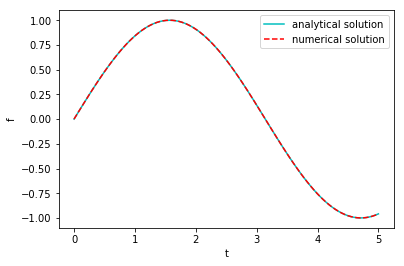

In [231]:
plt.xlabel("t")
plt.ylabel("f")
plt.plot(ts, np.sin(ts), 'c', label='analytical solution');
plt.plot(ts, fs, 'r--', label='numerical solution');
plt.legend(loc='best')


The numerical and analytical solutions agree.

## Discontinuous Functions
<a id='DiscontinuousFunctions'></a>
The computational solver to loops through the range of input vlaues.

It estimates the value of the function at each input value.

This makes it easy to apply the solver to piecewise or discontinous functions.

An example of where this is useful is where a *forcing function* effects your solution.

##### Example : A Mixing Tank
<a id='ExampleMixingTank'></a>
<img src="img/salt_tank.png" alt="Drawing" style="width: 200px;"/> 
    
A tank initially contains a mixture: 
- 300 g of salt 
- 1000 L of water. 

From t=0 min:
- inlet solution 4 g/L (salt/water)
- inlet flow rate 6 L/min. 

From t=10 min:
- inlet solution 2 g/L (salt/water)
- inlet flow rate 6 L/min (unchanged)

Oulet flow rate = inlet floow rate = 6 L/min (unchanged).

The contents are mixed thoroughly.

A differential equation to represent the change in the mass of salt in the tank with respect to time:




\begin{align*}
\frac{dM_S}{dt} &= u_{in}C_{in}(t) - u_{out}C_{out}(t)\\
                &= u_{in}C_{in}(t)-u_{out}\frac{M_S}{V} \\
\end{align*}

where
<br>$u$ = inlet flow rate
<br>$V$ = volume of liquid in tank
<br>$C_{in}$ = salt concentration inflow g/L
<br>$M_S$ = mass of salt in tank


Initial condition:
<br>$M_S(t=0) = 300$ 

We can first write a function to represent the change of $C_{in}$ with time:

In [232]:
def Cs(t):
    'inlet concentration of salt'
    if t < 0:
        cs = 0.0 # g/L
    elif (t > 0) and (t <= 10):
        cs = 4.0 
    else:
        cs = 2.0
    return cs



Then we write a function to define $\frac{dM_S}{dt}$ just as we did in the last example.

In [233]:
V = 1000.0 # volume of liquid in tank
u = 6.0    # inflow and outflow rate

def salt_mass(Ms, t):
    'mass of salt in the tank'
    dMsdt = u * Cs(t) - u * Ms / V
    return dMsdt

In [234]:
# initial value (at t=0)
M0 = 300 # g salt

# time span 
tspan = np.linspace(0.0, 15.0, 50)

# mass of salt in tank over time span
Ms = odeint(salt_mass, M0, tspan)


Plot the solution to observe the change in the rate of increase in salt concentration at $t=10$s.

Text(0,0.5,'Salt concentration (g/L)')

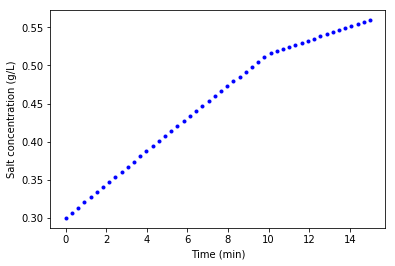

In [235]:
plt.plot(tspan, Ms/V, 'b.')
plt.xlabel('Time (min)')
plt.ylabel('Salt concentration (g/L)')


## Solving an ODE for a Specific *Solution* Value.
<a id='SolvingODESpecificSolutionValue'></a>
The analytical solution to an ODE is a function the value of input variable $x$ that makes $y(x)$ equal to some value of interest. 




In a numerical solution to an ODE we get a vector of independent variable values, and the corresponding function values at those values. 

This may not include the function value of itnerest. 

To solve for a particular function value we need a dfferent approach. 


One approach to this is using interpolation, which we studied in `05_Plotting_Analysing.ipynb`...

### Example : Reactor, Part 1
<a id='ExampleReactorPart1'></a>
The rate of change of the concentration $C_A$ of a substance within a reactor is:

$$\frac{dC_A}{dt}=-kC_A^2 $$

where
<br>$k = 0.23 \quad \textrm{L/mol/s}$

Initial condition:
<br>$C_A(t=0) = 2.3 \quad \textrm{mol/L}$ 


Compute the time it takes for $C_A$ to be reduced to $1 \textrm{mol/L}$.

*i.e. Find input variable $t$ when output variable $C_A = 1$*

In [236]:
k = 0.23
Ca0 = 2.3  # initial condition

def dCadt(Ca, t):
    return -k * Ca**2

tspan = np.linspace(0, 10, 14)  # range of time values
sol = odeint(dCadt, Ca0, tspan)

Text(0,0.5,'$C_A$ (mol/L)')

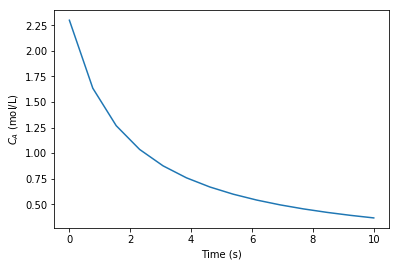

In [237]:
plt.plot(tspan, sol)
plt.xlabel('Time (s)')
plt.ylabel('$C_A$ (mol/L)')


We can see that the solution ($C_A = 1$) is close to 2s.

We create an interpolating function to estimate the solution.

First, observe how the solution is represented.

In [238]:
print(sol, type(sol))



[[2.3       ]
 [1.63477314]
 [1.26802375]
 [1.03567716]
 [0.87529271]
 [0.75792139]
 [0.66830573]
 [0.59764138]
 [0.54049165]
 [0.4933179 ]
 [0.45371772]
 [0.42000278]
 [0.39095185]
 [0.36565974]] <class 'numpy.ndarray'>


We can plot this range without issue.

However, when interpolating, we must specify the index of the range of values:

In [239]:
Ca = sol[:,0]

In [240]:
# interpolate : Method 1
from scipy.interpolate import interp1d

ca_func = interp1d(tspan, Ca, 'cubic')


# # interpolate : Method 2
# from scipy.interpolate import splrep
# from scipy.interpolate import splev

# order_poly = 3
# ca_func = splrep(tspan, Ca, k=order_poly)


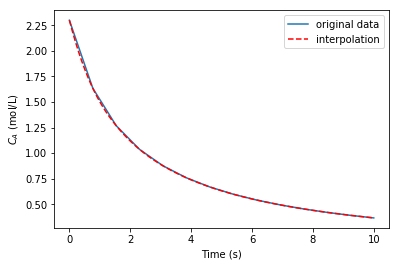

In [241]:
# plot the original data 
plt.plot(tspan, Ca, label='original data')

# plot the interpolated data
tspan_i = np.linspace(0, 10, 200)   # create a finer range of time variables

# Method 1
plt.plot(tspan_i, ca_func(tspan_i), 'r--', label='interpolation') # Method 1

# Method 2
#plt.plot(tspan_i, splev(tspan_i, ca_func), 'r--', label='interpolation') # Method 2

plt.xlabel('Time (s)')
plt.ylabel('$C_A$ (mol/L)')
plt.legend()

The interpolated data provides a good fit.

Now we solve the problem : find time, $t$ when $C_A = 1$

Remember, our approximation : $t \approx 2$ when $C_A = 1$

In [242]:
tguess = 2.0

def func(t):
    'returns 0 when interpolated function ca_func(t) = desired value, 1'
    return 1.0 - ca_func(t)


In `07_RootFinding_CoupledEquations.ipynb` we learnt to use the function `fsolve` for estimating the roots of a function given an initial estimate. 

Then we use `fsolve` to solve the function (find where function returns 0), usign initial guess = 2. 

In [243]:
from scipy.optimize import fsolve

tsol2 = fsolve(func, tguess)
# tsol2, = fsolve(func, tguess)  # using a comma extracts a single varibale stored as array
print(tsol2)


[2.45688986]


We can express this more concisely as a `lambda` function:

In [244]:
# input t
# output 1.0 - ca_func(t
tsol, = fsolve(lambda t: 1.0 - ca_func(t), tguess)
print(tsol)


2.4568898598165143


## Solution to an ODE evaulated at Specific *Input* Values.
<a id='SolutionODESpecificInputValues'></a>
Sometimes it is desirable to get the solution at specific points
<br>e.g. at $t = [0, 0.2, 0.4, 0.8]$ 

For example we might want to compare experimental measurements at those time points. 

To find the solution for specific input values, we simply set the range of input variables to the values of interest.

### Example : Reactor, Part 2
<a id='ExampleReactorPart2'></a>
The rate of change of the concentration $C_A$ of a substance within a reactor is:

$$\frac{dC_A}{dt}=-kC_A^2 $$

where
<br>$k = 0.23 \quad \textrm{L/mol/s}$

Initial condition:
<br>$C_A(t=0) = 2.3 \quad \textrm{mol/L}$ 


Compute the contration $C_A$ at time $t = [0, 2, 4, 8]$.

We can use the same function as in __Example : Reactor, Part 1__

In [245]:
k = 0.23
Ca0 = 2.3

def dCadt(Ca, t):
    return -k * Ca**2

...we just apply the function to the new range of time values:

Text(0,0.5,'$C_A$ (mol/L)')

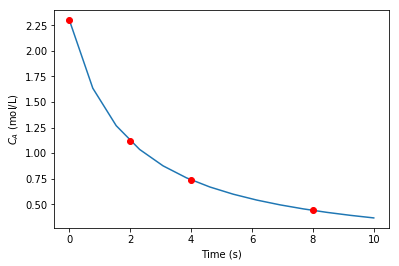

In [246]:
# previous problem solution
tspan = np.linspace(0, 10, 14)
plt.plot(tspan, odeint(dCadt, Ca0, tspan), label='range time')

# specific value problem
tspan = [0, 2, 4, 8]
plt.plot(tspan, odeint(dCadt, Ca0, tspan), 'ro', label='range time')

plt.xlabel('Time (s)')
plt.ylabel('$C_A$ (mol/L)')


In [247]:
print(odeint(dCadt, Ca0, tspan))

# use index to access column 0
# print(odeint(dCadt, Ca0, tspan)[:,0])


[[2.3       ]
 [1.11758989]
 [0.73812577]
 [0.43960241]]


## Matrix Multiplication Rules.
<a id='MatrixMultiplicationRules'></a>
The following section explains the process of matrix multiplication in case this is an unfamiliar topic for you.

Read this section to understand the use of matrices in the examples that follow.






If the number of __columns in A__ 
<br>is the same as number of __rows in B__, 
<br>we can find the matrix product of $\mathbf{A}$ and $\mathbf{B}$.
<br> $\mathbf{C} = \mathbf{A} \cdot \mathbf{B}$

For example:
<br>$\mathbf{A}$ has 3 rows and __3 columns__
<br>$\mathbf{B}$ has __3 rows__ and 1 column 
<br>($\mathbf{B}$ is a vector represented as a matrix)

\begin{equation*}
\underbrace{
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{bmatrix}
}_{\mathbf{A} \text{ 3 rows} \text{ 3 columns}}
\cdot
\underbrace{
\begin{bmatrix}
10 \\
20 \\
30 \\
\end{bmatrix}
}_{\mathbf{B} \text{  3 rows} \text{  1 column}}
\end{equation*}

So we can multiply them...

In matrix $\mathbf{C}$, the element in __row $i$__, __column $j$__ 

is equal to the dot product of the $i$th __row__ of $\mathbf{A}$, $j$th __column__ of $\mathbf{B}$.m



\begin{equation*}
\underbrace{
\begin{bmatrix}
\color{red}1 & \color{red}2 & \color{red}3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{bmatrix}
}_{\mathbf{A} \text{ 3 rows} \text{ 3 columns}}
\cdot
\underbrace{
\begin{bmatrix}
\color{red}{10} \\
\color{red}{20} \\
\color{red}{30} \\
\end{bmatrix}
}_{\mathbf{B} \text{  3 rows} \text{  1 column}}
=\underbrace{
\begin{bmatrix}
\color{red}{1 \cdot 10 \quad + \quad 2 \cdot 20 \quad + \quad 3 \cdot 30} \\
4 \cdot 10 \quad + \quad 5 \cdot 20 \quad + \quad 6 \cdot 30 \\
7 \cdot 10 \quad + \quad 8 \cdot 20 \quad + \quad 9 \cdot 30 \\
\end{bmatrix}
}_{\mathbf{C} \text{  3 rows} \text{  1 column}}
=\underbrace{
\begin{bmatrix}
\color{red}{140} \\
320 \\
500 \\
\end{bmatrix}
}_{\mathbf{C} \text{  3 rows} \text{  1 column1}}
\end{equation*}

\begin{equation*}
\underbrace{
\begin{bmatrix}
1 & 2 & 3 \\
\color{red}4 & \color{red}5 & \color{red}6 \\
7 & 8 & 9 \\
\end{bmatrix}
}_{\mathbf{A} \text{ 3 rows} \text{ 3 columns}}
\cdot
\underbrace{
\begin{bmatrix}
\color{red}{10} \\
\color{red}{20} \\
\color{red}{30} \\
\end{bmatrix}
}_{\mathbf{B} \text{  3 rows} \text{  1 column}}
=\underbrace{
\begin{bmatrix}
1 \cdot 10 \quad + \quad 2 \cdot 20 \quad + \quad 3 \cdot 30 \\
\color{red}{4 \cdot 10 \quad + \quad 5 \cdot 20 \quad + \quad 6 \cdot 30} \\
7 \cdot 10 \quad + \quad 8 \cdot 20 \quad + \quad 9 \cdot 30 \\
\end{bmatrix}
}_{\mathbf{C} \text{  3 rows} \text{  1 column}}
=\underbrace{
\begin{bmatrix}
140 \\
\color{red}{320} \\
500 \\
\end{bmatrix}
}_{\mathbf{C} \text{  3 rows} \text{  1 column1}}
\end{equation*}

\begin{equation*}
\underbrace{
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
\color{red}7 & \color{red}8 & \color{red}9 \\
\end{bmatrix}
}_{\mathbf{A} \text{ 3 rows} \text{ 3 columns}}
\cdot
\underbrace{
\begin{bmatrix}
\color{red}{10} \\
\color{red}{20} \\
\color{red}{30} \\
\end{bmatrix}
}_{\mathbf{B} \text{  3 rows} \text{  1 column}}
=\underbrace{
\begin{bmatrix}
1 \cdot 10 \quad + \quad 2 \cdot 20 \quad + \quad 3 \cdot 30 \\
4 \cdot 10 \quad + \quad 5 \cdot 20 \quad + \quad 6 \cdot 30 \\
\color{red}{7 \cdot 10 \quad + \quad 8 \cdot 20 \quad + \quad 9 \cdot 30} \\
\end{bmatrix}
}_{\mathbf{C} \text{  3 rows} \text{  1 column}}
=\underbrace{
\begin{bmatrix}
140 \\
320 \\
\color{red}{500} \\
\end{bmatrix}
}_{\mathbf{C} \text{  3 rows} \text{  1 column1}}
\end{equation*}

\begin{equation*}
\underbrace{
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{bmatrix}
}_{\mathbf{A} \text{ 3 rows} \text{ 3 columns}}
\cdot
\underbrace{
\begin{bmatrix}
10 \\
20 \\
30 \\
\end{bmatrix}
}_{\mathbf{B} \text{  3 rows} \text{  1 column}}
=\underbrace{
\begin{bmatrix}
1 \cdot 10 \quad + \quad 2 \cdot 20 \quad + \quad 3 \cdot 30 \\
4 \cdot 10 \quad + \quad 5 \cdot 20 \quad + \quad 6 \cdot 30 \\
7 \cdot 10 \quad + \quad 8 \cdot 20 \quad + \quad 9 \cdot 30 \\
\end{bmatrix}
}_{\mathbf{C} \text{  3 rows} \text{  1 column}}
=\underbrace{
\begin{bmatrix}
140 \\
320 \\
500 \\
\end{bmatrix}
}_{\mathbf{C} \text{  3 rows} \text{  1 column1}}
\end{equation*}

Matrix $\mathbf{C}$ therefore has: 
- the same number of __rows__ as $\mathbf{A}$,
- the same number of __columns__ as $\mathbf{B}$.

In [248]:
# In the equation above, vector B must be represented as a column vector
A = np.array([[1, 2, 3], 
              [4, 5, 6],
              [7, 8, 9]])


# In Python, 1D arrays are ALWAYS represented horizontally 
# This does not define the array as a row vector
B = np.array([10, 20, 30])


# For example, C is represented horizontally 
C = np.dot(A,B)
print(C)


[140 320 500]


As an example, if $\mathbf{B}$ were a row vector: 

\begin{equation*}
\underbrace{
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{bmatrix}
}_{\mathbf{A} \text{ 3 rows} \text{ 3 columns}}
\cdot
\underbrace{
\begin{bmatrix}
10 & 20 & 30 \\
\end{bmatrix}
}_{\mathbf{B} \text{  1 row} \text{  3 columns}}
\end{equation*}

We *cannot* find the dot product $\mathbf{B}\cdot\mathbf{A}$.
<br>The number of columns in $\mathbf{A}$ __is not__ the same as number of rows in $\mathbf{B}$.

We can swap the order of $\mathbf{A}$ and $\mathbf{B}$.
<br>The multiplication is now possible.
<br>However, the outcome is different.


\begin{equation*}
\underbrace{
\begin{bmatrix}
10 & 20 & 30 \\
\end{bmatrix}
}_{\mathbf{B} \text{ 1 row} \text{ 3 columns}}
\cdot
\underbrace{
\begin{bmatrix}
\color{red}1 & \color{blue}2 & \color{green}3 \\
\color{red}4 & \color{blue}5 & \color{green}6 \\
\color{red}7 & \color{blue}8 & \color{green}9 \\
\end{bmatrix}
}_{\mathbf{A} \text{  3 rows} \text{  3 columns}}
=\underbrace{
\begin{bmatrix}
\color{red}{10 \cdot 1 + 20 \cdot 4 + 30 \cdot 7} &
\color{blue}{4 \cdot 10 + 5 \cdot 20 + 6 \cdot 30} &
\color{green}{7 \cdot 10 + 8 \cdot 20 + 9 \cdot 30} \\
\end{bmatrix}
}_{\mathbf{C} \text{  1 row} \text{  3 columns}}
=\underbrace{
\begin{bmatrix}
\color{red}{140} &
\color{blue}{320} &
\color{green}{500} \\
\end{bmatrix}
}_{\mathbf{C} \text{  3 rows} \text{  1 column1}}
\end{equation*}

In Python, normal matrix multiplication rules apply to 2D arrays.
<br>This holds even if the length of one of the dimensions of the 2D array is equal to 1.



In [249]:
A = np.array([[1, 2, 3], 
              [4, 5, 6],
              [7, 8, 9]])

# 2D array
X = np.array([[10, 20, 30]])

# 2D array
Y = np.array([[10],
              [20], 
              [30]])

print(np.dot(X, A)) #, print(np.dot(A, X))
print(np.dot(A, Y)) #, print(np.dot(Y, A))

[[300 360 420]]
[[140]
 [320]
 [500]]


However, the orientation with which 1D arrays are shown (always horizontal) does not impact their allowbale placement in an expression. 

Python will automatially treat the 1D as a column where appropriate.

In [250]:
A = np.array([[1, 2, 3], 
              [4, 5, 6],
              [7, 8, 9]])

# 1D array
Z = np.array([10, 20, 30])

print(np.dot(Z, A))
print(np.dot(A, Z))

[300 360 420]
[140 320 500]


## Useful Matrix Operations
<a id='UsefulMatrixOperations'></a>

#### Inverse of a square matrix

In [251]:
A = np.array([[1,2], 
              [3, 4]]) 

Ainv = np.linalg.inv(A)

print(f"A = \n {A}")
print(f"Inverse of A = \n {Ainv}")

A = 
 [[1 2]
 [3 4]]
Inverse of A = 
 [[-2.   1. ]
 [ 1.5 -0.5]]


#### Determinant of a square matrix

In [252]:
A = np.array([[1,2], 
              [3, 4]]) 

Adet = np.linalg.det(A)

print(f"A = \n {A}")
print(f"Determinant of A = {round(Adet, 2)}")

A = 
 [[1 2]
 [3 4]]
Determinant of A = -2.0


#### Transpose of a matrix

- The columns of the transpose matrix are the rows of the original matrix.
- The rows of the transopse matrix are the columns of the original matrix.  

In [253]:
a = np.zeros((2,4))
print(a)
print()


print(a.T)
print()

#or 

print(np.transpose(a))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


#### Generate Identity Matrix

In [254]:
I = np.eye(2)
print(I)

print()

I = np.eye(4)
print(I)

[[1. 0.]
 [0. 1.]]

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## Systems of Ordinary Differential Equations 
<a id='SystemsOrdinaryDifferentialEquations '></a>
`odeint` can also be used to solve *systems* of coupled differential equations. 



### Example : Migration problem
A well known problem concerns an imaginary country with three cities, A, B and C. 
<br>At the end of each year, a fraction, $n$ of the people must leave each city.
<br>Half of the people leaving a city move to one of the two options, and half to the other.

<img src="img/cities3.png" alt="Drawing" style="width: 400px;"/> 

This gives us a system of simultaneous equations

\begin{align*}
\Delta A = \frac{Bn}{2} + \frac{Cn}{2} - An \\
\Delta B = \frac{An}{2} + \frac{Cn}{2} - Bn\\
\Delta C = \frac{An}{2} + \frac{Bn}{2} -Cn \\
\end{align*}




Matrices are a convenient way to represent this problem.  

\begin{equation*}
\begin{bmatrix}
\Delta A \\
\Delta B \\
\Delta C \\
\end{bmatrix}
=
\underbrace{
\begin{bmatrix}
-n & \frac{n}{2} & \frac{n}{2} \\
\frac{n}{2} & -n & \frac{n}{2} \\
\frac{n}{2} & \frac{n}{2} & -n \\
\end{bmatrix}
}_{\mathbf{migration}}
\cdot
\underbrace{
\begin{bmatrix}
A \\
B \\
C \\
\end{bmatrix}
}_{\mathbf{population}}
\end{equation*}



Let's use variable names $\mathbf{M}$ and $\mathbf{P}$.

\begin{equation*}
\begin{bmatrix}
\Delta a \\
\Delta b \\
\Delta c \\
\end{bmatrix}
=
\underbrace{
\begin{bmatrix}
-0.2 & 0.1 & 0.1 \\
0.1 & -0.2 & 0.1 \\
0.1 & 0.1 & -0.2 \\
\end{bmatrix}
}_{\mathbf{M}}
\cdot
\underbrace{
\begin{bmatrix}
A \\
B \\
C \\
\end{bmatrix}
}_{\mathbf{P}}
\end{equation*}



We can use `odeint` to solve coupled first order ordinary differential equations simultaneously (systems of ODEs).

First create matrix $\mathbf{M}$:

In [255]:
import numpy as np
M = np.full((3, 3), 0.01)
np.fill_diagonal(M, -0.02)
print(M)

[[-0.02  0.01  0.01]
 [ 0.01 -0.02  0.01]
 [ 0.01  0.01 -0.02]]


The initial value variable is a list.

Note, the values are input as a single data structure.

The elements are the initial populations $A$, $B$, and $C$.

In [256]:
# Initial population
P0 = np.array([190.0, 500.0, 30.0])


Timespan over which to evaluate the change in population:

In [257]:
# Time steps to evaluate
tspan = np.arange(0, 150)

The chnage in population is the dot product (or matrix product) of matrix $\mathbf{M}$, and the current populations, matrix $\mathbf{P}$.

Therefore the inputs to the function are:
- current population (matrix $\mathbf{P}$)
- timespan to investigate
- matrix $\mathbf{M}$

The function should output the __rate of change of each variable__ as a __single list__.

In [258]:
def dP_dt(P, t, M):
    
    dP_dt = np.dot(P, M)
    
    return [dP_dt[0], 
            dP_dt[1], 
            dP_dt[2]]



We run the `odeint` solver as before. 
<br>Inputs:
- function
- initial condition
- timespan
- additional arguments to function (matrix $\mathbf{M}$)

In [259]:
Ps = odeint(dP_dt, P0, tspan, args=(M,))


As before, the output is retured as a vector, each time, there is one vector for each population.

In [260]:
# first 5 rows of Ps
print(Ps[:5, :])


[[190.         500.          30.        ]
 [191.47772343 492.31583817  36.2064384 ]
 [192.91177343 484.85877818  42.22944839]
 [194.30344084 477.62210765  48.07445151]
 [195.65397826 470.59931305  53.74670869]]


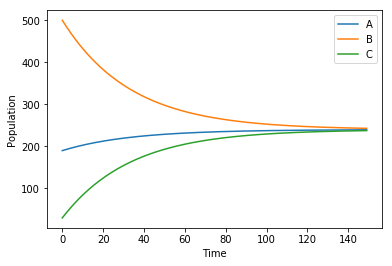

In [261]:
plt.plot(tspan, Ps[:,0], label="A")
plt.plot(tspan, Ps[:,1], label="B")
plt.plot(tspan, Ps[:,2], label="C")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();


For example we can use `odeint` to solve the population problem from earlier.

The function dP_dt is exactly the same as the function `change_pop` that we used  earlier. The only difference is that `dP_dt` returns the individual rates of chnage of each population as a list. 

We can check the solution by iteratively solving the equations over each time step using a `for` loop:

In [262]:
def dP_dt_manual(P, t, M):
    "Returns a vector of the population change over time t"
    
    # make 2D array to store population per timestep
    dPdt = P
    for time in t[:-1]:
        
        # Increment population 
        P = P + np.dot(P, M)
        
        # Store population
        dPdt = np.vstack((dPdt, P))
        
    return dPdt
        
dPdt = dP_dt_manual(P0, tspan, M) 


Now we can plot the manually computed solution on top of the numerical approximation using `odeint`:

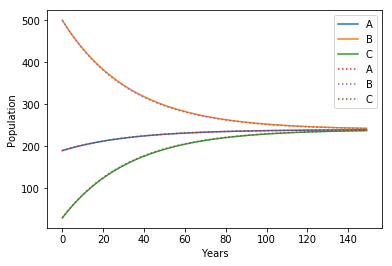

In [263]:
# Numerical Appproximation
plt.plot(tspan, Ps[:,0], label="A")
plt.plot(tspan, Ps[:,1], label="B")
plt.plot(tspan, Ps[:,2], label="C")

plt.plot(tspan, dPdt[:,0], ':', label="A")
plt.plot(tspan, dPdt[:,1], ':', label="B")
plt.plot(tspan, dPdt[:,2], ':', label="C")

plt.xlabel("Years")
plt.ylabel("Population")
plt.legend();

## Interactive Plots
<a id='InteractivePlots'></a>
Interactive plots allow us to dynamically observe the influence that changing different parameters has on an output.

To produce animated plots, we first need to install a program, FFmpeg,  for handling multimedia data.

Follow the instructions below to install ffmpeg:

### Installing FFmpeg 
<a id='InstallingFFmpeg'></a>

###### Installing FFmpeg on mac
Open a terminal.
Copy and paste the following command into the terminal to install homebrew (a linux-like package manager): 
>`ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"`

Press 'Enter' to install and enter your password when prompted.

Copy and paste the following command into the terminal to install FFmpeg: 
>`brew install ffmpeg` 

To check ffmpeg has installed copy and paste the following command into the terminal:
>`ffmpeg -version`

If FFmpeg has installed a few lines of code will appear, starting with the version number which will be something like:
>`ffmpeg version 3.4 Copyright (c) 2000-2017 `



###### Installing FFmpeg on linux
Open a terminal.
Copy and paste the following commands into the terminal (one-by-one, pressing enter after one) to install ffmpeg: 
>`sudo add-apt-repository ppa:kirillshkrogalev/ffmpeg-next
sudo apt-get update
sudo apt-get install ffmpeg`

To check ffmpeg has installed copy and paste the following command into the terminal:
>`ffmpeg -version`

If FFmpeg has installed a few lines of code will appear, starting with the version number which will be something like:
>`ffmpeg version 3.4 Copyright (c) 2000-2017 `





###### Installing FFmpeg on  windows

Open a terminal.

To find out what version of windows you have, copy and paste the following command into the terminal to see if your computer has a 32 or 64 bit CPU:
>`wmic os get osarchitecture`

Go to ffmpeg.zeranoe.com/builds/ 
 - Click the appropraite __Architecture__ for your computer.
 - Click Static __Linking__
 - Leave __Version__ as the default.
 - Click __Download Build__

Go to your computer's Downloads folder.
 - Right click on the newly downloaded .zip folder (it's name will start with `ffmpeg`).
 - Choose __Extract All__ from the drop-down menu.
 - If given the option to choose a location to extract the files to, choose your Program Files folder.<br>Otherwise, a non-.zip folder of the same name as the one you downloaded will appear in the Downloads folder. <br>Copy the folder to your Program Files folder.
 - Change rename of the folder you just copied into Program Files with the name:
 <br>`ffmpeg`
 
Go back to the terminal and copy and paste the following command into the terminal to add ffmpeg to the windows path: 
>`PATH=C:\Program Files\ffmpeg\bin;%PATH%`

To check ffmpeg has installed copy and paste the following command into the terminal:
>`ffmpeg -version`

If FFmpeg has installed a few lines of code will appear, starting with the version number which will be something like:
>`ffmpeg version 3.4 Copyright (c) 2000-2017 `



As a simple example, we will plot

$$
f(t) = t^{\alpha} \sin(\omega t)
$$

- independent variable, $t$
- dependent variable, $f(t)$
- input parameters, $\alpha$ and $\omega$

We will create two sliders allowing us to change the value of $\alpha$ and $\omega$ *interactively*.

We can observe the resulting change in $f(t)$ dynamically.

Interactive plots be can created using Python module `ipywidgets`. 

Run the following cell to install `ipywidgets`



In [264]:
try:
    import ipywidgets
except ImportError:
    try:
        !{sys.executable} -m pip -q install ipywidgets
        import ipywidgets
    except ImportError:
        !{sys.executable} -m pip -q --user install ipywidgets
    finally:
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")        
from ipywidgets import interact

$$
f(t) = t^{\alpha} \sin(\omega t)
$$

Let's assign arbitrary values  $\alpha = 0$ and $\omega =1 $

Start by plotting $f(t)$ against $t$ as usual.



*(To generate symbols α or ω type `\omega` or `\alpha`, pressing  `Tab` key at the end.)*

Text(0.5,1,'$α$ = 0, $ω$ = 1')

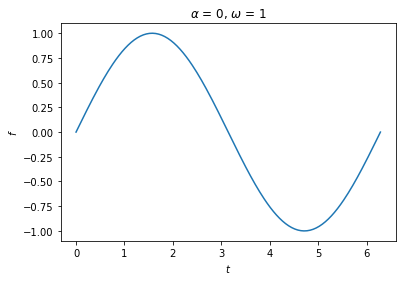

In [265]:
α, ω = 0, 1
t = np.linspace(0, 2*np.pi, 200)  

plt.plot(t, (t**α)*np.sin(ω*t))

plt.xlabel('$t$')
plt.ylabel('$f$')
plt.title(f"$α$ = {α}, $ω$ = {ω}")


Next encasulate the code to generate the plot within a function.

The parameters we want to vary are given as function arguments.

The default values are the values used in the previous example.



In [266]:
def plot(α=0, ω=1):
    "A plot of the function f(t)= (t**α)*np.sin(ω*t)"
    t = np.linspace(0, 2*np.pi, 200)  
    
    plt.plot(t, (t**α)*np.sin(ω*t))
    
    plt.xlabel('$t$')
    plt.ylabel('$f$')
    plt.title(r"$\alpha$ = {}, $\omega$ = {}".format(α, ω))
    

The `interact` function, takes the following arguments:
- the plotting function 
- a tuple for each variable parameter:
 - maximum value (inclusive) 
 - minimum value (inclusive) 
 - step size between each possible value

In [267]:
interact(plot, α=(0, 2, 0.25), ω=(-10, 10, 0.25));

interactive(children=(FloatSlider(value=0.0, description='α', max=2.0, step=0.25), FloatSlider(value=1.0, desc…

You can now adjust the values by moving the sliders.

The new values appear as the title to the plot.

## Animated Plots
<a id='AnimatedPlots'></a>
Plotting can be a very useful way to visualise what is happening in a dynamic physical system. 

Matplotlib can be used to create animated plots showing the change in a system over time.

We will use the `animation` and `rc` subpackages of matplotlib.   


We will also use `IPython.display.HTML` to view the animated output within jupyter notebook.

In [268]:
from matplotlib import animation, rc
from IPython.display import HTML

Let's start with a simple example to learn how to build an animation.

We will create an animation of a physical model. 



The set of steps to build an animated plot is:
1. Create a figure window
1. Create axes within the window
1. Create object(s) to animate e.g. a line or point
1. Define an animation function for the change you want to see at each timestep
1. Use the function `animation.FuncAnimation` to create your animation and give it a name.
1. Call the animation name to play it.
1. (Save the animation)

### Example: Animating a Line
#### An Animated Sine Wave. 
<a id='ExampleAnimatingLine'></a>

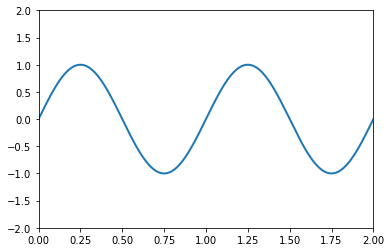

In [269]:
import matplotlib.pyplot as plt
import numpy as np
# 1. Create a figure window. 
fig = plt.figure()

# 2. Creates axes within the window
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))

# 3. Empty object (no data opints) to animate e.g. a line 
# Name must end with a `,` comma.  
line, = ax.plot([], [], lw=2)

# 4. Animation function: called sequentially
# i = frame number.
# Sine wave generated, phase shift proportional to i
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    # single return arguments should be given as a tuple with one value
    return (line,)

# 5. Animates the data; 
# 100 frames
# 20ms delay between frames
anim = animation.FuncAnimation(fig, animate, frames=100, interval=20)

# Set the animation display format to html which the non-Python parts of this notebook are written in.
rc('animation', html='html5')

# 6. Play the animation 
anim

# 7. Save the animation as a .mp4 file - if you save the file, it won't play
# 15 frames per second
# 1800 bits of data processed/stored per second
#writer = animation.writers['ffmpeg'](fps=15, bitrate=1800)
#anim.save('img/sin_movie.mp4', writer=writer)

When returning a single argument (e.g. `line`) it is returned as a tuple with one value i.e. `(line, )`.

### Example : Simulating Physical Systems
#### Spring-Mass System
<a id='ExampleSpringMassSystem'></a>
If you are studying an engineering-related subject, you will most likely study simple harmonic motion; a type of periodic motion or oscillation motion.

For this oscillation to happen, the restoring force is:
- directly proportional to the displacement
- in the direction opposite to the displacement.





A typical example of this is a mass attached to a spring.

<img src="img/spring_mass_system.gif" alt="Drawing" style="width: 500px;"/>



If we assume that:
 - the spring is ideal (it has no weight, mass, or damping losses)
 - there is no friction 
 
we can use a simple equation to give the position of the mass, $x$, as a function of time, $t$:

$x(t) = A cos(\omega t - \phi)$ 

where:
<br>$A$: Maximum amplitude (displacment from initial position), defined by the initial conditions of the system.
<br>$\phi$ : Phase (the initial angle of a sinusoidal function at its origin)
<br>$\omega$ : Angular frequency (frequency of oscillation expressed in radians)



Angular frequency

$\omega=2\pi f = \sqrt{\frac{k}{m}}$

where
<br>$k$ : spring constant
<br>$m$ : mass (kg)
<br>$f$ : frequency (Hz)

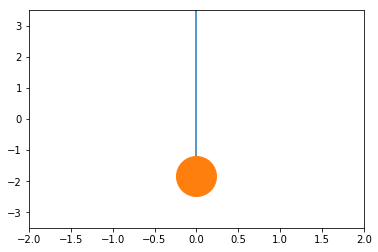

In [270]:
# 1. Create a figure window.
fig = plt.figure()

# 2. Create axes within the window
ax = plt.axes(xlim=(-2, 2), ylim=(-3.5,3.5))

# 3. Two objects to animate
line,   = ax.plot([2,1], [4,3], marker="" , ls="-")  # a line
point, = ax.plot([1], [1], marker='o', ms=40)        # a point

# Spring data
k = 100
m = 20
w = np.sqrt(k/m)
phi = 2
A = 2

# Position of mass as function of time
def fun(time):
    return A*np.sin(w * time + phi)

# 4. Animation function
# Timestep = 1/20 = 0.05
def animate(t):    
    x = fun(t/20)     
    line.set_data([0,0], [4, -x])    
    point.set_data(0, -x)    
    return line, point
  
    
# 5. Create animation
# 500 frames
# 50ms (0.05s) delay between frames to match timestep
anim = animation.FuncAnimation(fig, animate, frames=500, interval=50)

rc('animation', html='html5')

# 6. Play animation
anim

# 7. Save animation - if uncommented, animation won't move
# writer = animation.writers['ffmpeg'](fps=15, bitrate=1800)
# anim.save('img/spring_movie.mp4', writer=writer)


### Example : Simulating Physical Systems
#### Trajectory : Plotting the Object
<a id='ExamplePlottingObject'></a>
A projectile is launched with initial velocity $v$, at an angle of $\theta$.

If we neglect the force of drag on the projectile, it will travel in an arc. 

It's position in the horizontal (x) and vertical (y) direction at time $t$ can be found by.

$x= vt\cos(\theta)$
<br>$y= vt\sin(\theta) - \frac{1}{2}gt^2$

where gravity, $g=9.81$ms$^{-2}$ 

Initial conditions:
 - $\theta = \pi/2$
 - velocity, $v=10$ms$^{-1}$ 

<img src="img/projectile3.png" alt="Drawing" style="width: 300px;"/>


1. Create a figure window
1. Create axes within the figure window.
1. Create a point to animate
1. Create variables for $g$, $v$, and $\theta$
1. Write a function, `fun` to find x and y position as a function of time, t (function argument = t)
1. To animate the motion of the particle create a function, `animate`. Within animate call the function, `func`. Use a timestep of i/10.
1. Use the function `animation.FuncAnimation` to create the animation.

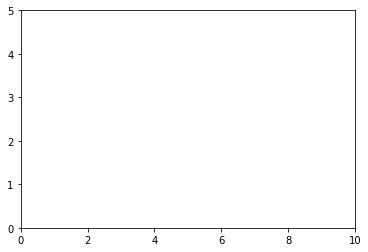

In [271]:
# Creates a figure window.
fig = plt.figure()

# Creates axes within the window
ax = plt.axes(xlim=(0, 10), ylim=(0, 5))

# Object to animate
point, = ax.plot([1], [1], marker='o', ms=40)  # for points

g = 9.81
v = 10
theta = np.pi/4

# Position of mass as function of time
def fun(t):
    x = v * t * np.cos(theta)
    y = v * t * np.sin(theta) - (0.5 * g * t**2)
    return x, y

def animate(i):   
    x, y = fun(i/10)   
    point.set_data(x, y)    
    return  (point,)
    
# Animates the data
# 50 frames
# 50ms delay between frames : animation plays at double speed of time-varying system
anim = animation.FuncAnimation(fig, animate, frames=30, interval=50, blit=True)

anim

### Example : Simulating Physical Systems
#### Trajectory : Plotting the Path
<a id='ExamplePlottingPath'></a>

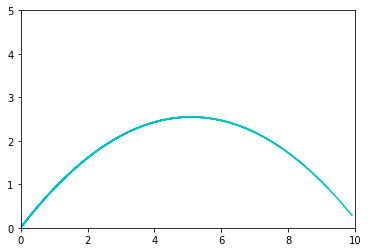

In [272]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

g = 9.81
v = 10
theta = np.pi/4

t = np.linspace(0, 500)
x = v * t * np.cos(theta)
y = v * t * np.sin(theta) - (0.5 * g * t**2)

fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(0, 5))

def animate(i):

    i /= 10
    if i == 0:
        s = i
    else:
        s = np.linspace(0, i)

    x = v * s * np.cos(theta)
    y = v * s * np.sin(theta) - (0.5 * g * s**2)
    ax.plot(x,y, 'c')
    
ani = animation.FuncAnimation(fig, animate, frames=15, interval=50)
ani

### Example : Simulating Physical Systems
#### Trajectory : Plotting the Path & Object
<a id='ExamplePlottingPathObject'></a>

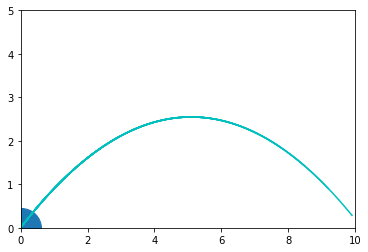

In [273]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

g = 9.81
v = 10
theta = np.pi/4

t = np.linspace(0, 500)
x = v * t * np.cos(theta)
y = v * t * np.sin(theta) - (0.5 * g * t**2)

fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(0, 5))

# # Object to animate
point, = ax.plot([1], [1], marker='o', ms=40)  # for points

def animate(i):

    i /= 10
    if i == 0:
        s = i
    else:
        s = np.linspace(0, i)
    

    x = v * s * np.cos(theta)
    y = v * s * np.sin(theta) - (0.5 * g * s**2)
    ax.plot(x, y, 'c')
    
    if i == 0:
        point.set_data(x, y)   
    else:  
        point.set_data(x[-1], y[-1])    
    return  (point,)
    
ani = animation.FuncAnimation(fig, animate, frames=15, interval=50)
ani

# Summary
<a id='Summary'></a>
 - `scipy.integrate.odeint` can be used to find a numerical approximation for the change in a parameter over a given range of input values (expressed as an ordinary differential equation, ode).
 - This allows us to easily deal with dicontinuous functions.
 - An can be solved for a specific *solution* value by interpolating.
 - We can find the value of the function at a specific value by selecting the points at which the function is approximated.
 - We can create interactive plots with `ipywidgets`. 
 - `matplotlib.animation` and `matplotlib.rc` can be used to produce animated plots.
 - `IPython.display.HTML` allows us to view and play these animations within Jupyter notebook.
 - Installing the program `ffmpeg` allows us to save an animation in a format we can view outside of the Python environment.